In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

lab3_data = sns.load_dataset('titanic')
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'male'), 'who'] = 'boy'
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'female'), 'who'] = 'girl'
lab3_data.loc[lab3_data['survived'] == 0, 'survived_str'] = 'no'
lab3_data.loc[lab3_data['survived'] == 1,  'survived_str'] = 'yes'

In [5]:
sns.set_style("white")
sns.set_context("paper")

<ipython-input-4-97791ee7fd3c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  sns.barplot(data=lab3_data, x='class', y='survived', hue='who', capsize=0.05, ci=90, palette=color_scheme)


<Axes: xlabel='class', ylabel='survived'>

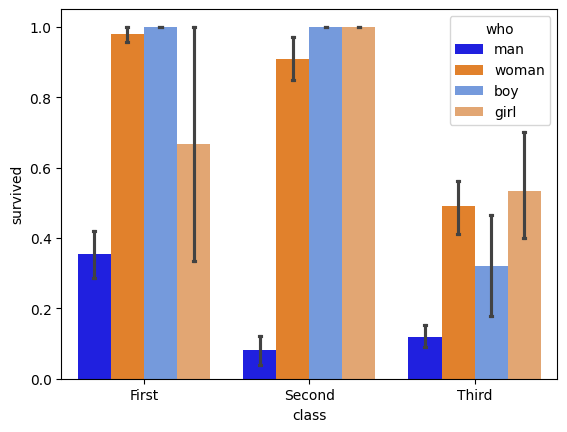

In [4]:
color_scheme = {'man': 'blue', 'woman': 'tab:orange', 'boy': 'cornflowerblue', 'girl': 'sandybrown'}
sns.barplot(data=lab3_data, x='class', y='survived', hue='who', capsize=0.05, ci=90, palette=color_scheme)

<ipython-input-6-b0be2697b707>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  ax = sns.barplot(data=filtered_data, x='class', y='survived', hue='who', capsize=0.05, ci=90, palette=color_scheme, order=custom_order)


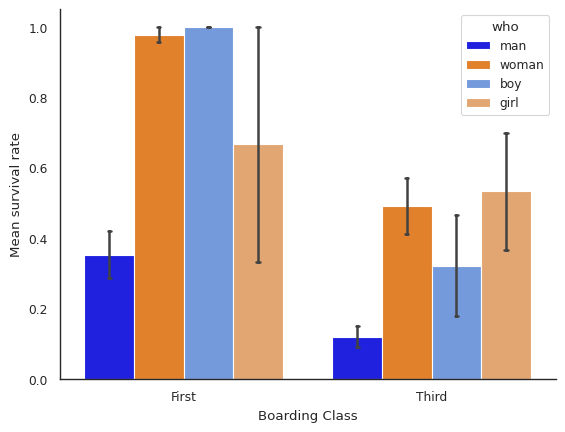

In [6]:
custom_order = ['First', 'Third']
filtered_data = lab3_data[lab3_data['class'] != 'Second']
ax = sns.barplot(data=filtered_data, x='class', y='survived', hue='who', capsize=0.05, ci=90, palette=color_scheme, order=custom_order)
ax.set_xlabel('Boarding Class')
ax.set_ylabel('Mean survival rate')
sns.despine()

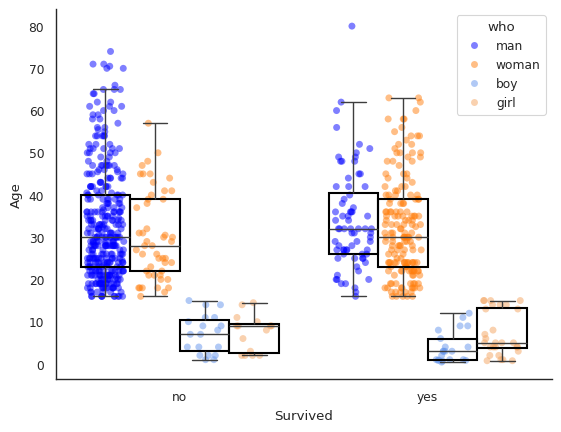

In [13]:
boxprops = {'edgecolor': 'black', 'linewidth': 1.5, 'facecolor': 'none'}
axes2 = sns.boxplot(data=lab3_data, x='survived_str', y='age', hue='who', fliersize=0, boxprops=boxprops, zorder=5)
sns.stripplot(data=lab3_data, x='survived_str', y='age', hue='who', jitter=0.3, alpha=0.5, dodge=True, palette=color_scheme, zorder=0)
handles, labels = axes2.get_legend_handles_labels()
plt.legend(handles[4:8], labels[4:8], title='who')
axes2.set_xlabel('Survived')
axes2.set_ylabel('Age')
sns.despine()

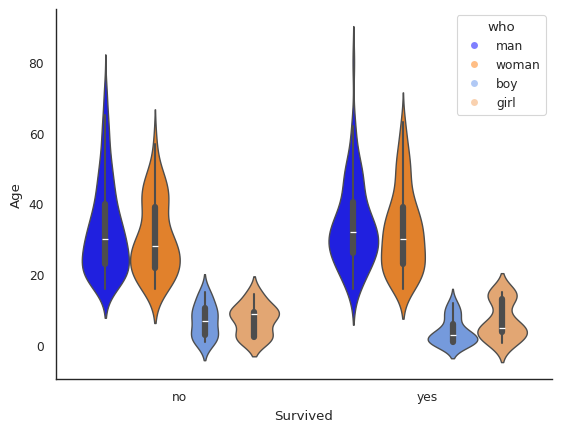

In [11]:
axes3 = sns.violinplot(data=lab3_data, x='survived_str', y='age', hue='who', palette=color_scheme)
plt.legend(handles[4:8], labels[4:8], title='who')
axes3.set_xlabel('Survived')
axes3.set_ylabel('Age')
sns.despine()

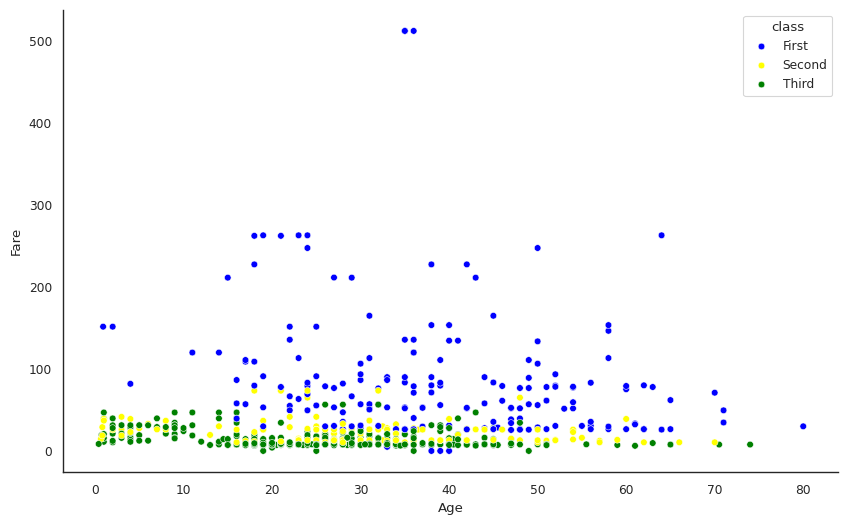

In [22]:
df = sns.load_dataset('titanic')
plt.figure(figsize=(10, 6))
custom_palette = {'First': 'blue', 'Second': 'yellow', 'Third': 'green'}
axes4 = sns.scatterplot(x='age', y='fare', data=df, hue='class', palette=custom_palette)
axes4.set_xlabel('Age')
axes4.set_ylabel('Fare')
sns.despine()

In [23]:
lab3_data_subset=lab3_data[['class','who','fare']]
lab3_data_subset=lab3_data_subset.dropna(how='any')
lab3_data_subsetAverage=lab3_data_subset.groupby(['class','who']).mean()
lab3_data_subsetAverage=lab3_data_subsetAverage.reset_index()
lab3_data_subsetAverage.head()

,class,who,fare
0,First,boy,117.802767
1,First,girl,160.962500
2,First,man,65.951086
3,First,woman,104.317995
4,Second,boy,27.306022


[Text(0.5, 22.71666666666666, 'Demographic'),
 Text(49.91666666666667, 0.5, 'Boarding Class'),
 [Text(0.5, 0, 'boy'),
  Text(1.5, 0, 'girl'),
  Text(2.5, 0, 'man'),
  Text(3.5, 0, 'woman')]]

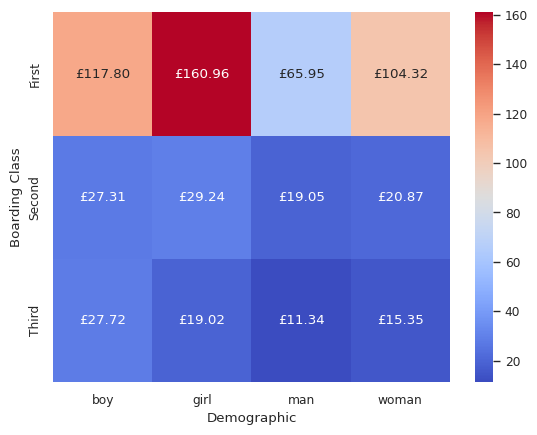

In [27]:
matrix_data = lab3_data_subsetAverage.pivot(index='class', columns='who', values='fare')
axes5 = sns.heatmap(data=matrix_data, annot=True,fmt='.2f',cmap='coolwarm')
for text in axes5.texts: text.set_text('£' + text.get_text())
axes5.set(xlabel='Demographic', ylabel='Boarding Class', xticklabels=['boy','girl','man','woman'])